## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,confusion_matrix,classification_report,precision_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,log_loss,f1_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor , BaggingClassifier,GradientBoostingClassifier , RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsRegressor

from lazypredict.Supervised import LazyRegressor


import tensorflow as tf
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model

## Uploading Dataset and Initial Analysis of Data

In [2]:
dataset = pd.read_csv('Data\DataCoSupplyChainDataset.csv',encoding='unicode-escape')
dataset.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25              314.64  Advance shipping   
1            -249.09              311.36     Late delivery   
2            -247.78              309.72  Shipping on time   
3              22.86              304.81  Advance shipping   
4             134.21              298.25  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods        Caguas      Puerto Rico  ...   
2                   0  Sporting Goods      San Jose          EE. UU.  ...   
3                   0  Sporting Goods   Los Angeles          EE. UU.  ...   
4                   0  Sporting Goods        Caguas      Puerto Rico  ...   

  Order Zipcode Product Card Id Product Category Id Product Description  \
0           NaN            1360                  73                 NaN   
1           NaN            1360                  73                 NaN   
2           NaN            1360                  73                 NaN   
3           NaN            1360                  73                 NaN   
4           NaN            1360                  73                 NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

   Product Status  shipping date (DateOrders)   Shipping Mode  
0               0            02-03-2018 22:56  Standard Class  
1               0             1/18/2018 12:27  Standard Class  
2               0             1/17/2018 12:06  Standard Class  
3               0             1/16/2018 11:45  Standard Class  
4               0             1/15/2018 11:24  Standard Class  

[5 rows x 48 columns]

In [3]:
print('The DataCo dataset has {} rows and {} columns.'.format(dataset.shape[0],dataset.shape[1]))

The DataCo dataset has 180519 rows and 48 columns.


In [4]:
dataset.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count                 180519.00                      180519.00   
mean                       3.50                           2.93   
std                        1.62                           1.37   
min                        0.00                           0.00   
25%                        2.00                           2.00   
50%                        3.00                           4.00   
75%                        5.00                           4.00   
max                        6.00                           4.00   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count          180519.00           180519.00           180519.00   
mean               21.97              183.11                0.55   
std               104.43              120.04                0.50   
min             -4274.98                7.49                0.00   
25%                 7.00              104.38                0.00   
50%                31.52              163.99                1.00   
75%                64.80              247.40                1.00   
max               911.80             1939.99                1.00   

       Customer Zipcode  Latitude  Longitude  Order Customer Id  Order Id  \
count         180516.00 180519.00  180519.00          180519.00 180519.00   
mean           35921.13     29.72     -84.92            6691.38  36221.89   
std            37542.46      9.81      21.43            4162.92  21045.38   
min              603.00    -33.94    -158.03               1.00      1.00   
25%              725.00     18.27     -98.45            3258.50  18057.00   
50%            19380.00     33.14     -76.85            6457.00  36140.00   
75%            78207.00     39.28     -66.37            9779.00  54144.00   
max            99205.00     48.78     115.26           20757.00  77204.00   

       ...  Order Item Quantity     Sales  Order Item Total  \
count  ...            180519.00 180519.00         180519.00   
mean   ...                 2.13    203.77            183.11   
std    ...                 1.45    132.27            120.04   
min    ...                 1.00      9.99              7.49   
25%    ...                 1.00    119.98            104.38   
50%    ...                 1.00    199.92            163.99   
75%    ...                 3.00    299.95            247.40   
max    ...                 5.00   1999.99           1939.99   

       Order Profit Per Order  Order Zipcode  Product Card Id  \
count               180519.00       24840.00        180519.00   
mean                    21.97       55426.13           692.51   
std                    104.43       31919.28           336.45   
min                  -4274.98        1040.00            19.00   
25%                      7.00       23464.00           403.00   
50%                     31.52       59405.00           627.00   
75%                     64.80       90008.00          1004.00   
max                    911.80       99301.00          1363.00   

       Product Category Id  Product Description  Product Price  Product Status  
count            180519.00                 0.00      180519.00       180519.00  
mean                 31.85                  NaN         141.23            0.00  
std                  15.64                  NaN         139.73            0.00  
min                   2.00                  NaN           9.99            0.00  
25%                  18.00                  NaN          50.00            0.00  
50%                  29.00                  NaN          59.99            0.00  
75%                  45.00                  NaN         199.99            0.00  
max                  76.00                  NaN        1999.99            0.00  

[8 rows x 26 columns]

In [5]:
dataset.describe(include=['object','bool'])

Type Delivery Status Category Name Customer City Customer Country  \
count   180519          180519        180519        180519           180519   
unique       4               4            50           563                2   
top      DEBIT   Late delivery        Cleats        Caguas          EE. UU.   
freq     69295           98977         24551         66770           111146   

       Customer Fname Customer Lname Customer Segment Customer State  \
count          180519         180511           180519         180519   
unique            782           1109                3             46   
top              Mary          Smith         Consumer             PR   
freq            65150          64104            93504          69373   

                Customer Street  ...     Order City   Order Country  \
count                    180519  ...         180519          180519   
unique                     7458  ...           3597             164   
top     9126 Wishing Expressway  ...  Santo Domingo  Estados Unidos   
freq                        122  ...           2211           24840   

       order date (DateOrders)     Order Region Order State Order Status  \
count                   180519           180519      180519       180519   
unique                   65752               23        1089            9   
top           12/14/2016 12:29  Central America  Inglaterra     COMPLETE   
freq                         5            28341        6722        59491   

                                            Product Image  \
count                                              180519   
unique                                                118   
top     http://images.acmesports.sports/Perfect+Fitnes...   
freq                                                24515   

                            Product Name shipping date (DateOrders)  \
count                             180519                     180519   
unique                               118                      63701   
top     Perfect Fitness Perfect Rip Deck           01-05-2016 05:58   
freq                               24515                         10   

         Shipping Mode  
count           180519  
unique               4  
top     Standard Class  
freq            107752  

[4 rows x 22 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer Fname                 180519 non-null  object 
 11  Customer Lname                 180511 non-null  object 
 12  Customer Segment              

In [7]:
df_cont = [ col for col in dataset.select_dtypes(include=['number'])]
df_cat = [ col  for col in dataset.select_dtypes(include=['object'])]


In [23]:
for i in df_cat:
  print(i," : ", "\n")
  print(dataset[i].value_counts().head(10),"\n\n")

Type  :  

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64 


Delivery Status  :  

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64 


Category Name  :  

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Name: Category Name, dtype: int64 


Customer City  :  

Caguas          66770
Chicago          3885
Los Angeles      3417
Brooklyn         3412
New York         1816
Philadelphia     1577
Bronx            1500
San Diego        1437
Miami            1314
Houston          1297
Name: Customer City, dtype: int64 


Customer Country  :  

EE. UU.        111146
Puerto Rico     69373
Name: Customer Coun

## Data Cleaning and Processing 

In [24]:
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str) 

In [25]:
#Viewing the null columns
null_cols = dataset.columns[dataset.isnull().sum() > 0]
null_cols

Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')

In [26]:
#Null values
dataset[null_cols].isnull().sum()

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [27]:
#Dropping columns with null values as well as which are irrelevant
dataset.drop(['Order Zipcode' , 'Product Description' ,'Product Status','Customer Street','Customer Fname','Customer Lname',
           'Product Image','Customer Zipcode' , ] , axis=1 , inplace=True)

In [28]:
df = dataset.dropna(axis = 0)

In [29]:
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0              91.25              314.64  Advance shipping   
1            -249.09              311.36     Late delivery   
2            -247.78              309.72  Shipping on time   
3              22.86              304.81  Advance shipping   
4             134.21              298.25  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods        Caguas      Puerto Rico  ...   
2                   0  Sporting Goods      San Jose          EE. UU.  ...   
3                   0  Sporting Goods   Los Angeles          EE. UU.  ...   
4                   0  Sporting Goods        Caguas      Puerto Rico  ...   

     Order Region      Order State     Order Status  Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE             1360   
1      South Asia         Rajastán          PENDING             1360   
2      South Asia         Rajastán           CLOSED             1360   
3         Oceania       Queensland         COMPLETE             1360   
4         Oceania       Queensland  PENDING_PAYMENT             1360   

   Product Category Id  Product Name Product Price shipping date (DateOrders)  \
0                   73  Smart watch         327.75           02-03-2018 22:56   
1                   73  Smart watch         327.75            1/18/2018 12:27   
2                   73  Smart watch         327.75            1/17/2018 12:06   
3                   73  Smart watch         327.75            1/16/2018 11:45   
4                   73  Smart watch         327.75            1/15/2018 11:24   

    Shipping Mode Customer Full Name  
0  Standard Class      CallyHolloway  
1  Standard Class          IreneLuna  
2  Standard Class   GillianMaldonado  
3  Standard Class           TanaTate  
4  Standard Class      OrliHendricks  

[5 rows x 41 columns]

### Instead of keeping seperate columns for scheduled and real shipment date, we can create 1 column telling if the order shipment was delayed, on-time or before-time

In [30]:
dataset.loc[:,['Days for shipment (scheduled)','Days for shipping (real)']]

Days for shipment (scheduled)  Days for shipping (real)
0                                   4                         3
1                                   4                         5
2                                   4                         4
3                                   4                         3
4                                   4                         2
...                               ...                       ...
180514                              4                         4
180515                              2                         3
180516                              4                         5
180517                              4                         3
180518                              4                         4

[180519 rows x 2 columns]

In [31]:
dataset['Order Shipment'] = dataset['Days for shipment (scheduled)'] - dataset['Days for shipping (real)']

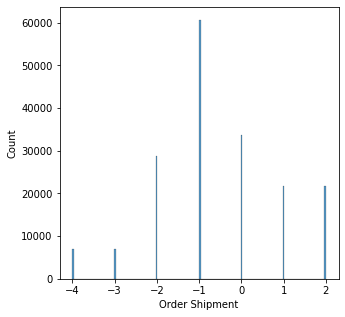

In [32]:
plt.figure(figsize=(5,5))
sns.histplot(dataset['Order Shipment'])
plt.show()

In [33]:
dataset['Order Shipment'] = dataset['Order Shipment'].astype(np.number)

for i in range(0,len(dataset['Order Shipment'])):
    if(dataset['Order Shipment'][i] < 0):
        dataset['Order Shipment'][i] = 'DELAY'
    elif(dataset['Order Shipment'][i] > 0):
        dataset['Order Shipment'][i] = 'BEFORE_TIME'
    else:
        dataset['Order Shipment'][i] = 'ON_TIME'

In [34]:
dataset["Order Shipment"].value_counts(normalize=True)*100

DELAY         57.28
BEFORE_TIME   24.02
ON_TIME       18.70
Name: Order Shipment, dtype: float64

In [35]:
dataset.drop(['Days for shipment (scheduled)','Days for shipping (real)'],axis=1,inplace=True)

# Data Analysis 

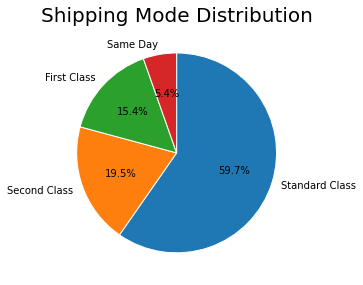

In [36]:
plt.subplots(figsize=(5,5))
plt.pie(df['Shipping Mode'].value_counts(),
    labels= dict(df['Shipping Mode'].value_counts()).keys(),
    autopct= '%1.1f%%',
    startangle= 90,
    counterclock=False,
    wedgeprops = {'edgecolor' : 'white'})
plt.title('Shipping Mode Distribution', size= 20)
plt.tight_layout()
#plt.savefig('shipping mode.png',dpi=200)
plt.show();

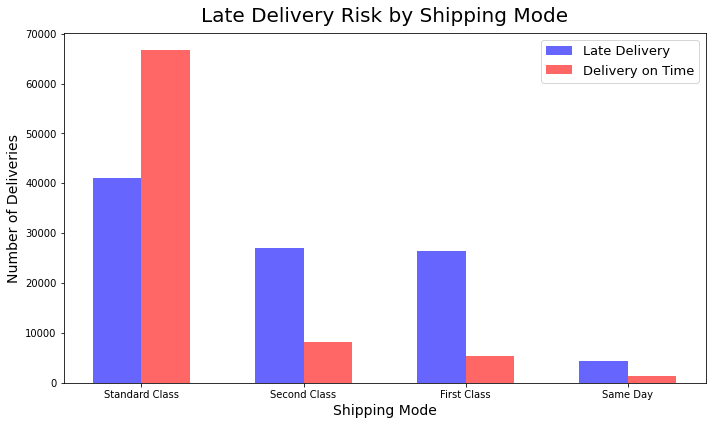

In [37]:
late = df[(df['Late_delivery_risk'] == 1)]
ontime = df[(df['Late_delivery_risk'] == 0)]
count1=late['Shipping Mode'].value_counts()
count2=ontime['Shipping Mode'].value_counts()
names=df['Shipping Mode'].value_counts().keys()
fig,ax = plt.subplots(figsize=(10,6))
index=np.arange(4)
bar_width=0.3
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Late Delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Delivery on Time')
plt.xlabel('Shipping Mode', fontsize= 14)
plt.ylabel('Number of Deliveries', fontsize= 14)
plt.title('Late Delivery Risk by Shipping Mode', fontsize= 20, y=1.015)
plt.legend(fontsize= 13)
plt.xticks(index+bar_width/2,names)
plt.tight_layout()
#plt.savefig('late delivery risk - shipping mode.png',dpi=200)
plt.show();

In [38]:
data_delivery_status=df.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
fig = px.bar(  data_delivery_status,   x='Delivery Status' , y='Number of Orders',
    color=data_delivery_status['Number of Orders'], height=500)
fig.show()

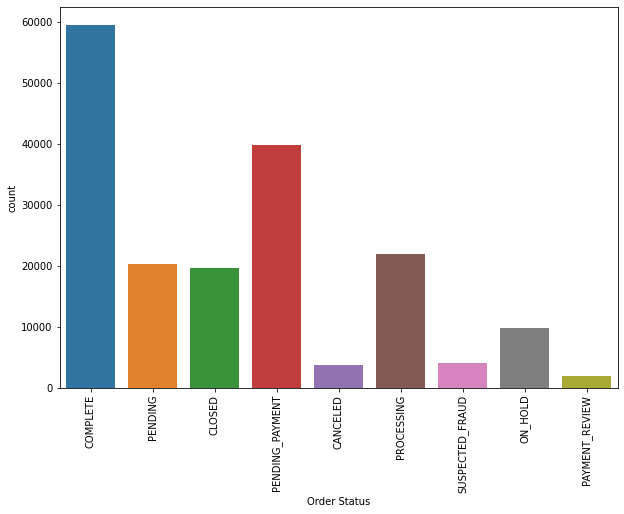

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x = dataset['Order Status'])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
total_Orders = data_delivery_status['Number of Orders'].sum()
Percentage_of_late_delivery = (df['Late_delivery_risk'].sum()/total_Orders*100)
Percentage_of_late_delivery

54.82913155955883

In [41]:
fig=px.pie(data_delivery_status, names='Delivery Status' , values='Number of Orders',title='Delivery Status',
    color=data_delivery_status['Number of Orders'])
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

In [42]:
data_delivery_status_region=df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
fig= px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  ,
            title="Delivery Status by Regions",color='Order Region', )
fig.show()

Central America and Western Europa have the most lated delivered Orders.

Central America and Western Europa also have the most shipping cancelation.

Percentage of late delivery is 54.83. Means, more than 50% products are delivered late. But question why Central America has the highest number of late delivery. 

After Sales analysis by region I found out central America has the massive number of purchase.So, percentage of late delivery is 54.83. that is why it is showing America has the massive number of late delivery.

This percentage of late delivery can effect the revenue.because customer can move to another company to buy products.

In [43]:
data_Region=df.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region, x='Number of Orders',y = 'Order Region',title='Total Sales by Region',color ='Number of Orders' , )

Sales by Country

In [44]:
#Order Country
df_sales_country=df.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

Sales by Products

In [45]:
#Product
df_sales_country=df.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= True)
px.bar(df_sales_country.head(20), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')

In [46]:
#Product and deliveray status
df_sales_pd=df.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')

In [47]:
profits= df.groupby('Product Name')['Order Profit Per Order'].mean().sort_values(ascending=False).head(10).sort_values()

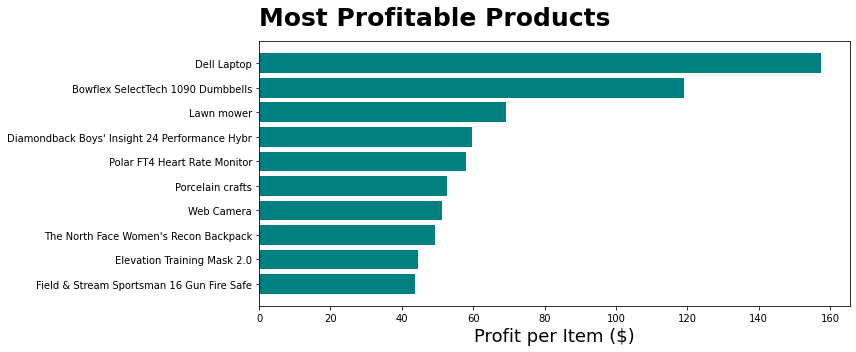

In [48]:
plt.subplots(figsize=(12,5))
plt.barh(list(dict(profits).keys()), profits, color= 'teal')
plt.title('Most Profitable Products', fontweight ='bold', size= 25, loc='left', pad=16)
plt.xlabel('Profit per Item ($)', fontsize = 18)
plt.rc('axes', labelsize=10)    
plt.tight_layout()

#plt.savefig('most profitable products.png',dpi=200)
plt.show();

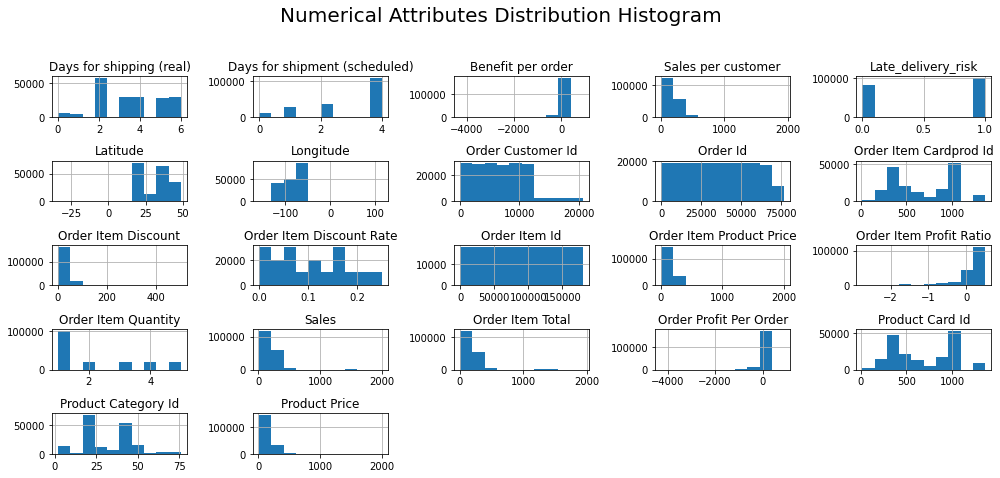

In [49]:
df.hist(figsize=(14,6))
plt.tight_layout()
plt.suptitle('Numerical Attributes Distribution Histogram', size= 20, y= 1.1)
#plt.savefig('Numerical Attributes Distribution Histogram.png',dpi=200)
plt.show();

# Fraud Prediction

In [50]:
suspected_fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']

In [51]:
suspected_fraud_df.shape #So, total 4000 Marked Fraudulent Transactions

(4062, 41)

<AxesSubplot:title={'center':'Top 10 Fraudulent Customers'}, xlabel='Order Customer Id,Order Status'>

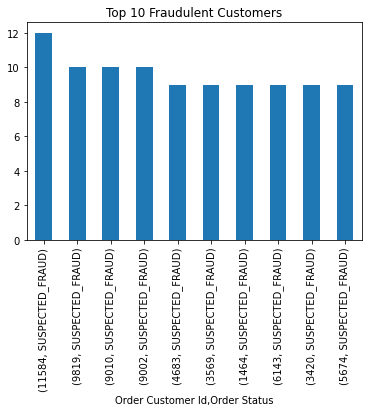

In [52]:
suspected_fraud_df.groupby('Order Customer Id')['Order Status'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'bar' , title = 'Top 10 Fraudulent Customers')

In [53]:
# Top 10 products which undergo fraudulent activity
suspected_fraud_df.groupby('Product Name')['Order Status'].value_counts().sort_values(ascending=False).head(10)

Product Name                                   Order Status   
Perfect Fitness Perfect Rip Deck               SUSPECTED_FRAUD    560
Nike Men's CJ Elite 2 TD Football Cleat        SUSPECTED_FRAUD    516
Nike Men's Dri-FIT Victory Golf Polo           SUSPECTED_FRAUD    481
O'Brien Men's Neoprene Life Vest               SUSPECTED_FRAUD    439
Field & Stream Sportsman 16 Gun Fire Safe      SUSPECTED_FRAUD    394
Pelican Sunstream 100 Kayak                    SUSPECTED_FRAUD    329
Diamondback Women's Serene Classic Comfort Bi  SUSPECTED_FRAUD    305
Nike Men's Free 5.0+ Running Shoe              SUSPECTED_FRAUD    267
Under Armour Girls' Toddler Spine Surge Runni  SUSPECTED_FRAUD    223
Children's heaters                             SUSPECTED_FRAUD     18
Name: Order Status, dtype: int64

<AxesSubplot:title={'center':'Top Quantity of Fraudulent purchases'}, xlabel='Order Item Quantity,Order Status'>

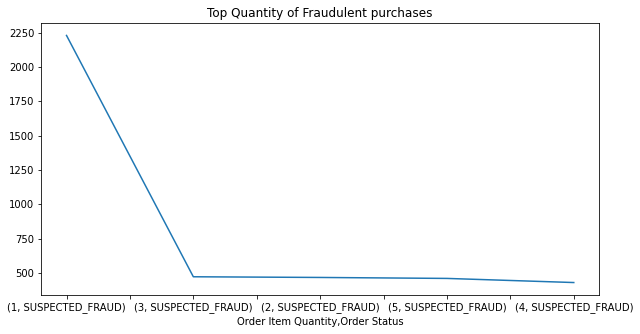

In [54]:
#Analysing frequency of quantity for fraudulent purchases
plt.figure(figsize=(10,5))
suspected_fraud_df.groupby('Order Item Quantity')['Order Status'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'line' , title = 'Top Quantity of Fraudulent purchases')

In [55]:
# From the above plot we see that fraudsters order quantity is most of the times of single quantity

suspected_fraud_df.groupby('Order Item Quantity')['Order Status'].value_counts().sort_values(ascending=False)

Order Item Quantity  Order Status   
1                    SUSPECTED_FRAUD    2229
3                    SUSPECTED_FRAUD     473
2                    SUSPECTED_FRAUD     468
5                    SUSPECTED_FRAUD     461
4                    SUSPECTED_FRAUD     431
Name: Order Status, dtype: int64

Now, lets try to pick their locations

In [56]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

Above output shows the concentration of customers around the world using a world map (Most from American States, Makes sense as most of the sales data is from USA)

We no longer require the longitude and the latitude columns so going ahead and dropping the same.

In [57]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [58]:
suspected_fraud_df.groupby(['Customer City'])['Order Status'].value_counts().sort_values(ascending=False).head(10)

Customer City  Order Status   
Caguas         SUSPECTED_FRAUD    1583
Chicago        SUSPECTED_FRAUD      80
Los Angeles    SUSPECTED_FRAUD      72
Brooklyn       SUSPECTED_FRAUD      55
Philadelphia   SUSPECTED_FRAUD      42
San Diego      SUSPECTED_FRAUD      41
Bronx          SUSPECTED_FRAUD      41
Las Vegas      SUSPECTED_FRAUD      34
Miami          SUSPECTED_FRAUD      32
New York       SUSPECTED_FRAUD      31
Name: Order Status, dtype: int64

Most of the fraudulent transactions are happening from these cities

<AxesSubplot:ylabel='Customer Segment,Order Status'>

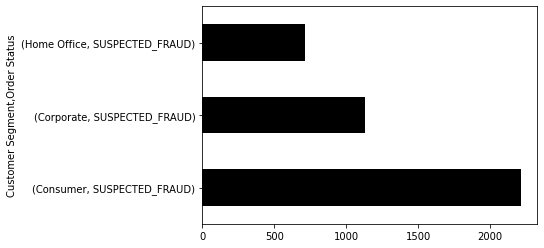

In [59]:
suspected_fraud_df.groupby('Customer Segment')['Order Status'].value_counts().sort_values(ascending=False).plot(kind='barh' , color = 'black')

As expected most of the frauds are from consumer transactions, let's check the pattern between these transactions over the years

<AxesSubplot:xlabel='order year,Order Status'>

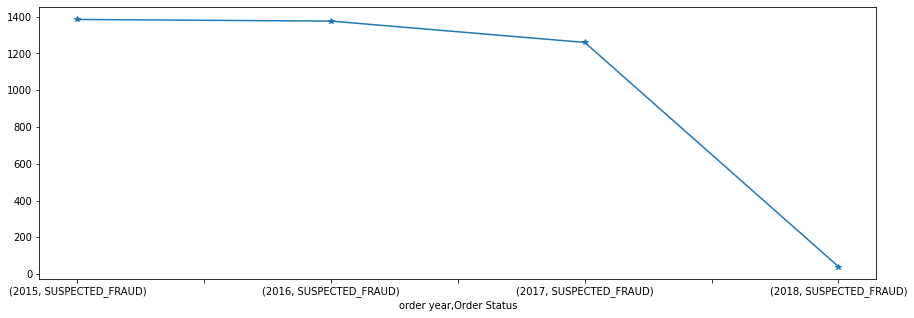

In [60]:
suspected_fraud_df['order date (DateOrders)'] = pd.to_datetime(suspected_fraud_df['order date (DateOrders)'])
suspected_fraud_df['order month'] = pd.DatetimeIndex(suspected_fraud_df['order date (DateOrders)']).month
suspected_fraud_df['order year'] = pd.DatetimeIndex(suspected_fraud_df['order date (DateOrders)']).year
suspected_fraud_df['order date'] = pd.DatetimeIndex(suspected_fraud_df['order date (DateOrders)']).day
suspected_fraud_df['order day'] = pd.DatetimeIndex(suspected_fraud_df['order date (DateOrders)']).dayofweek

suspected_fraud_df.groupby('order year')['Order Status'].value_counts().sort_values(ascending=False).plot(kind='line', marker='*' , figsize=(15,5))

There is a sharp decrease in the number of fraudulent activities from 2017 to 2018, may because of less data for that year

In [61]:
suspected_fraud_df.groupby(['Department Name','Product Name'])['Order Status'].value_counts().sort_values(ascending=False).head(10)

Department Name  Product Name                                   Order Status   
Apparel          Perfect Fitness Perfect Rip Deck               SUSPECTED_FRAUD    560
                 Nike Men's CJ Elite 2 TD Football Cleat        SUSPECTED_FRAUD    516
Golf             Nike Men's Dri-FIT Victory Golf Polo           SUSPECTED_FRAUD    481
Fan Shop         O'Brien Men's Neoprene Life Vest               SUSPECTED_FRAUD    439
                 Field & Stream Sportsman 16 Gun Fire Safe      SUSPECTED_FRAUD    394
                 Pelican Sunstream 100 Kayak                    SUSPECTED_FRAUD    329
                 Diamondback Women's Serene Classic Comfort Bi  SUSPECTED_FRAUD    305
Footwear         Nike Men's Free 5.0+ Running Shoe              SUSPECTED_FRAUD    267
Golf             Under Armour Girls' Toddler Spine Surge Runni  SUSPECTED_FRAUD    223
Apparel          Children's heaters                             SUSPECTED_FRAUD     18
Name: Order Status, dtype: int64

In [62]:
suspected_fraud_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'Customer Full Name', 'order month', 'order year',
       'order date', 'order day'],
      dtype='object')

In [64]:
fraud_dataset = df.drop(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount', 'Order Customer Id', 'Order Item Id', 'Order Profit Per Order', 
       'Product Card Id', 'Product Category Id', 'shipping date (DateOrders)',
       'Shipping Mode', 'Customer Full Name'], axis=1)

In [66]:
q1 = fraud_dataset.select_dtypes(include=[np.number]).quantile(0.25)
q3 = fraud_dataset.select_dtypes(include=[np.number]).quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [67]:
print('Below is a table that tells us the percentage of outliers for each column\n\n',(((fraud_dataset < (ll)) | (fraud_dataset > (ul))).sum()/len(fraud_dataset))*100)

Below is a table that tells us the percentage of outliers for each column

 Category Name              0.00
Customer City              0.00
Customer Country           0.00
Customer Segment           0.00
Customer State             0.00
Department Name            0.00
Market                     0.00
Order City                 0.00
Order Country              0.00
Order Item Discount Rate   0.00
Order Item Product Price   1.13
Order Item Profit Ratio    9.58
Order Item Quantity        0.00
Order Item Total           1.08
Order Region               0.00
Order State                0.00
Order Status               0.00
Product Name               0.00
Product Price              1.13
Sales                      0.27
dtype: float64


In [68]:
fraud_dataset = fraud_dataset[~((fraud_dataset < (ll)) |(fraud_dataset > (ul))).any(axis=1)]

In [69]:
fraud_dataset_num = fraud_dataset[fraud_dataset.select_dtypes(include=[np.number]).columns]

In [70]:
corr = fraud_dataset_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

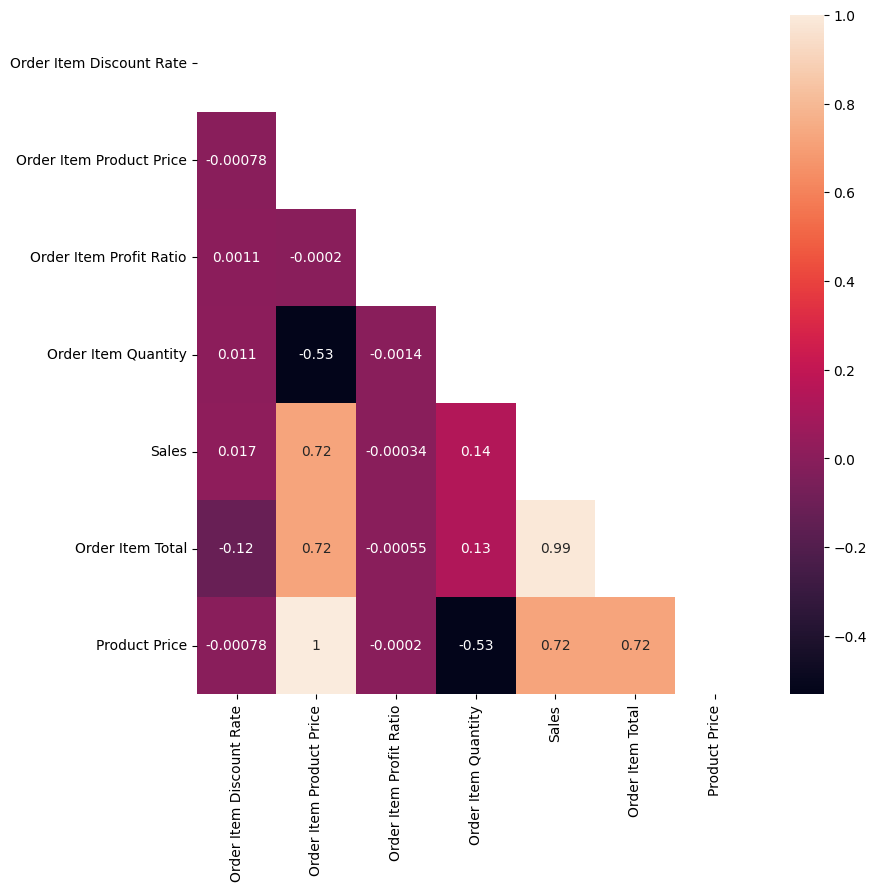

In [71]:
plt.figure(figsize=(9,9),dpi=100)
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [72]:
fraud_dataset.drop('Order Item Total', axis =1 , inplace = True) # Highly collinear with Sales

In [73]:
fraud_dataset['Order Status'].value_counts()

COMPLETE           52799
PENDING_PAYMENT    35359
PROCESSING         19470
PENDING            17979
CLOSED             17458
ON_HOLD             8756
SUSPECTED_FRAUD     3579
CANCELED            3267
PAYMENT_REVIEW      1679
Name: Order Status, dtype: int64

In [74]:
fraud_dataset['fraud'] = np.where(fraud_dataset['Order Status'] == 'SUSPECTED_FRAUD', 1, 0) # MAking the target column and deleting the previous one
fraud_dataset.drop('Order Status', axis =1 , inplace = True)

In [75]:
lab_en = LabelEncoder()
#scaler = MinMaxScaler()
for i in fraud_dataset.select_dtypes(include=['object']).columns:
  fraud_dataset[i]= lab_en.fit_transform(fraud_dataset[i]) #Label Encoding 

In [76]:
fraud_dataset

Category Name  Customer City  Customer Country  Customer Segment  \
0                  36             66                 1                 0   
3                  36            285                 0                 2   
4                  36             66                 1                 1   
5                  36            505                 0                 0   
6                  36             66                 1                 2   
...               ...            ...               ...               ...   
180513             15            262                 0                 2   
180514             15             59                 0                 2   
180516             15             55                 0                 1   
180517             15             66                 1                 0   
180518             15             66                 1                 0   

        Customer State  Department Name  Market  Order City  Order Country  \
0                   36                4       3         329             70   
3                    5                4       3        3213              8   
4                   36                4       3        3213              8   
5                   31                4       3        3194              8   
6                   36                4       3        1230             31   
...                ...              ...     ...         ...            ...   
180513              32                3       3        2909             31   
180514              31                3       3        2909             31   
180516               7                3       3          25              8   
180517              36                3       3          25              8   
180518              36                3       3        2193             69   

        Order Item Discount Rate  Order Item Product Price  \
0                           0.04                    327.75   
3                           0.07                    327.75   
4                           0.09                    327.75   
5                           0.10                    327.75   
6                           0.12                    327.75   
...                          ...                       ...   
180513                      0.25                    399.98   
180514                      0.00                    399.98   
180516                      0.02                    399.98   
180517                      0.03                    399.98   
180518                      0.04                    399.98   

        Order Item Profit Ratio  Order Item Quantity  Sales  Order Region  \
0                          0.29                    1 327.75            15   
3                          0.08                    1 327.75            11   
4                          0.45                    1 327.75            11   
5                          0.06                    1 327.75            11   
6                          0.33                    1 327.75             7   
...                         ...                  ...    ...           ...   
180513                     0.40                    1 399.98             7   
180514                     0.10                    1 399.98             7   
180516                     0.36                    1 399.98            11   
180517                     0.48                    1 399.98            11   
180518                     0.44                    1 399.98            13   

        Order State  Product Name  Product Price  fraud  
0               475            71         327.75      0  
3               833            71         327.75      0  
4               833            71         327.75      0  
5               833            71         327.75      0  
6               386            71         327.75      0  
...             ...           ...            ...    ...  
180513          911            21         399.98      0  
180514          911     

In [77]:
fraud_dataset.fraud.value_counts()

0    156767
1      3579
Name: fraud, dtype: int64

In [78]:
df_constant = add_constant(fraud_dataset)
df_constant.head()

const  Category Name  Customer City  Customer Country  Customer Segment  \
0   1.00             36             66                 1                 0   
3   1.00             36            285                 0                 2   
4   1.00             36             66                 1                 1   
5   1.00             36            505                 0                 0   
6   1.00             36             66                 1                 2   

   Customer State  Department Name  Market  Order City  Order Country  \
0              36                4       3         329             70   
3               5                4       3        3213              8   
4              36                4       3        3213              8   
5              31                4       3        3194              8   
6              36                4       3        1230             31   

   Order Item Discount Rate  Order Item Product Price  \
0                      0.04                    327.75   
3                      0.07                    327.75   
4                      0.09                    327.75   
5                      0.10                    327.75   
6                      0.12                    327.75   

   Order Item Profit Ratio  Order Item Quantity  Sales  Order Region  \
0                     0.29                    1 327.75            15   
3                     0.08                    1 327.75            11   
4                     0.45                    1 327.75            11   
5                     0.06                    1 327.75            11   
6                     0.33                    1 327.75             7   

   Order State  Product Name  Product Price  fraud  
0          475            71         327.75      0  
3          833            71         327.75      0  
4          833            71         327.75      0  
5          833            71         327.75      0  
6          386            71         327.75      0

To select the sugnificant variables we will selected them based on the p-values of the same, the hypothesis is such that:

    H0: Feature is significant where p-value < 0.05
    H1: Feature is not significant where p-Value > 0.05

In [79]:
st.chisqprob = lambda chisq, fraud_dataset: st.chi2.sf(chisq, fraud_dataset)
cols=df_constant.columns[:-1]
model=sm.Logit(fraud_dataset.fraud,df_constant[cols])
result=model.fit()
result.summary()

         Current function value: 0.106824
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fraud   No. Observations:               160346
Model:                          Logit   Df Residuals:                   160327
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 May 2023   Pseudo R-squ.:                0.001062
Time:                        15:44:05   Log-Likelihood:                -17129.
converged:                      False   LL-Null:                       -17147.
Covariance Type:            nonrobust   LLR p-value:                  0.006232
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.6785      0.136    -27.137      0.000      -3.944      -3.413
Category Name               -0.0016      0.001     -1.105      0.269      -0.004       0.001
Customer City            -1.209e-05      0.000     -0.091      0.928      -0.000       0.000
Customer Country             0.0785      0.049      1.604      0.109      -0.017       0.174
Customer Segment            -0.0523      0.022     -2.331      0.020      -0.096      -0.008
Customer State               0.0008      0.002      0.511      0.609      -0.002       0.004
Department Name             -0.0049      0.008     -0.644      0.520      -0.020       0.010
Market                      -0.0019      0.016     -0.121      0.904      -0.033       0.029
Order City               -2.583e-05   1.74e-05     -1.485      0.138   -5.99e-05    8.26e-06
Order Country               -0.0007      0.000     -1.559      0.119      -0.001       0.000
Order Item Discount Rate     0.0962      0.235      0.409      0.682      -0.365       0.557
Order Item Product Price     0.1344   1.46e+11   9.21e-13      1.000   -2.86e+11    2.86e+11
Order Item Profit Ratio     -0.0777      0.088     -0.885      0.376      -0.250       0.094
Order Item Quantity          0.0212        nan        nan        nan         nan         nan
Sales                       -0.0005        nan        nan        nan         nan         nan
Order Region                 0.0064      0.003      2.513      0.012       0.001       0.011
Order State              -8.218e-05   5.74e-05     -1.430      0.153      -0.000    3.04e-05
Product Name                 0.0003      0.001      0.267      0.789      -0.002       0.003
Product Price               -0.1341   1.46e+11  -9.18e-13      1.000   -2.86e+11    2.86e+11
============================================================================================
"""

In [80]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


                          CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                             0.02           0.03        0.03    0.00
Category Name                     1.00           1.00        1.00    0.27
Customer City                     1.00           1.00        1.00    0.93
Customer Country                  0.98           1.19        1.08    0.11
Customer Segment                  0.91           0.99        0.95    0.02
Customer State                    1.00           1.00        1.00    0.61
Department Name                   0.98           1.01        1.00    0.52
Market                            0.97           1.03        1.00    0.90
Order City                        1.00           1.00        1.00    0.14
Order Country                     1.00           1.00        1.00    0.12
Order Item Discount Rate          0.69           1.75        1.10    0.68
Order Item Product Price          0.00            inf        1.14    1.00
Order Item Profit Ratio           0.78

In [81]:
final_fraud_df = df_constant[['Category Name', 'Market', 
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer State', 'Department Name', 'Order City', 'Order Region', 'Order State',
       'Product Name', 'Product Price','fraud']]

In [82]:
final_fraud_df

Category Name  Market  Customer City  Customer Country  \
0                  36       3             66                 1   
3                  36       3            285                 0   
4                  36       3             66                 1   
5                  36       3            505                 0   
6                  36       3             66                 1   
...               ...     ...            ...               ...   
180513             15       3            262                 0   
180514             15       3             59                 0   
180516             15       3             55                 0   
180517             15       3             66                 1   
180518             15       3             66                 1   

        Customer Segment  Customer State  Department Name  Order City  \
0                      0              36                4         329   
3                      2               5                4        3213   
4                      1              36                4        3213   
5                      0              31                4        3194   
6                      2              36                4        1230   
...                  ...             ...              ...         ...   
180513                 2              32                3        2909   
180514                 2              31                3        2909   
180516                 1               7                3          25   
180517                 0              36                3          25   
180518                 0              36                3        2193   

        Order Region  Order State  Product Name  Product Price  fraud  
0                 15          475            71         327.75      0  
3                 11          833            71         327.75      0  
4                 11          833            71         327.75      0  
5                 11          833            71         327.75      0  
6                  7          386            71         327.75      0  
...              ...          ...           ...            ...    ...  
180513             7          911            21         399.98      0  
180514             7          911            21         399.98      0  
180516            11           88            21         399.98      0  
180517            11           88            21         399.98      0  
180518            13          965            21         399.98      0  

[160346 rows x 13 columns]

In [83]:
fraudulent_df = final_fraud_df[final_fraud_df['fraud'] == 1]
non_fraudulent_df = final_fraud_df[final_fraud_df['fraud'] == 0]

In [111]:
undersampled_non_fraudulent_df = non_fraudulent_df.sample(n=15000, random_state=42)



# Combine the undersampled majority class with the fraudulent class
balanced_df = pd.concat([undersampled_non_fraudulent_df, fraudulent_df], axis=0)

In [112]:
balanced_df

Category Name  Market  Customer City  Customer Country  \
176116             34       1             66                 1   
39427              15       2             66                 1   
156551             11       1             66                 1   
152398             15       4             66                 1   
50437              30       1            528                 0   
...               ...     ...            ...               ...   
180244             15       3            462                 0   
180274             15       3             66                 1   
180309             15       3            327                 0   
180352             15       3              3                 0   
180490             15       3            292                 0   

        Customer Segment  Customer State  Department Name  Order City  \
176116                 0              36                6        1391   
39427                  1              36                3         707   
156551                 0              36                0        1907   
152398                 1              36                3        2887   
50437                  1               8                0        3212   
...                  ...             ...              ...         ...   
180244                 0               5                3        2033   
180274                 1              36                3        2015   
180309                 0               5                3        2920   
180352                 0              29                3        3522   
180490                 0               5                3        2624   

        Order Region  Order State  Product Name  Product Price  fraud  
176116            17           38            95          39.99      0  
39427              3          823            21         399.98      0  
156551            22           90            67          59.99      0  
152398            21         1050            21         399.98      0  
50437             22          211            52         129.99      0  
...              ...          ...           ...            ...    ...  
180244            15          949            21         399.98      1  
180274             7          756            21         399.98      1  
180309             7          575            21         399.98      1  
180352            15         1064            21         399.98      1  
180490            13          605            21         399.98      1  

[18579 rows x 13 columns]

In [113]:
balanced_df['fraud'].value_counts()

0    15000
1     3579
Name: fraud, dtype: int64

In [114]:
X = balanced_df.drop('fraud',axis=1)
y = balanced_df['fraud']

In [115]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=5)

In [116]:
#machine learning model pipeline
model_pipeline = []
model_pipeline.append(LogisticRegression(solver = 'saga' , random_state = 42 , class_weight = 'balanced' , penalty = 'elasticnet', l1_ratio = 0.5 , max_iter = 1000))
model_pipeline.append(SGDClassifier(loss = 'modified_huber' , penalty = 'elasticnet', alpha = 0.1 ))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier(random_state = 24))
model_pipeline.append(RandomForestClassifier(max_depth = 15 , min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500))
model_pipeline.append(GradientBoostingClassifier(n_estimators = 250 , max_depth = 5))
model_pipeline.append(AdaBoostClassifier(random_state = 0))
model_pipeline.append(GaussianNB())
model_pipeline.append(LGBMClassifier(max_depth = 5, random_state = 0 , save_binary = True , max_bin = 2))

In [117]:
model_list = ['LogisticRegression' , 'SGD' , 'KNN' , 'DecisionTree' , 'RandomForest' , 'Gradientboosting' , 'Adaboost' , 'Naive Bayes' , 'LightGBM']
roc_auc_list = []
acc_list = []
cm_list = []
cr_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    roc_auc_list.append(roc_auc_score(y_test, y_pred))
    cm_list.append(confusion_matrix(y_test, y_pred))
    cr_list.append(classification_report(y_test, y_pred))

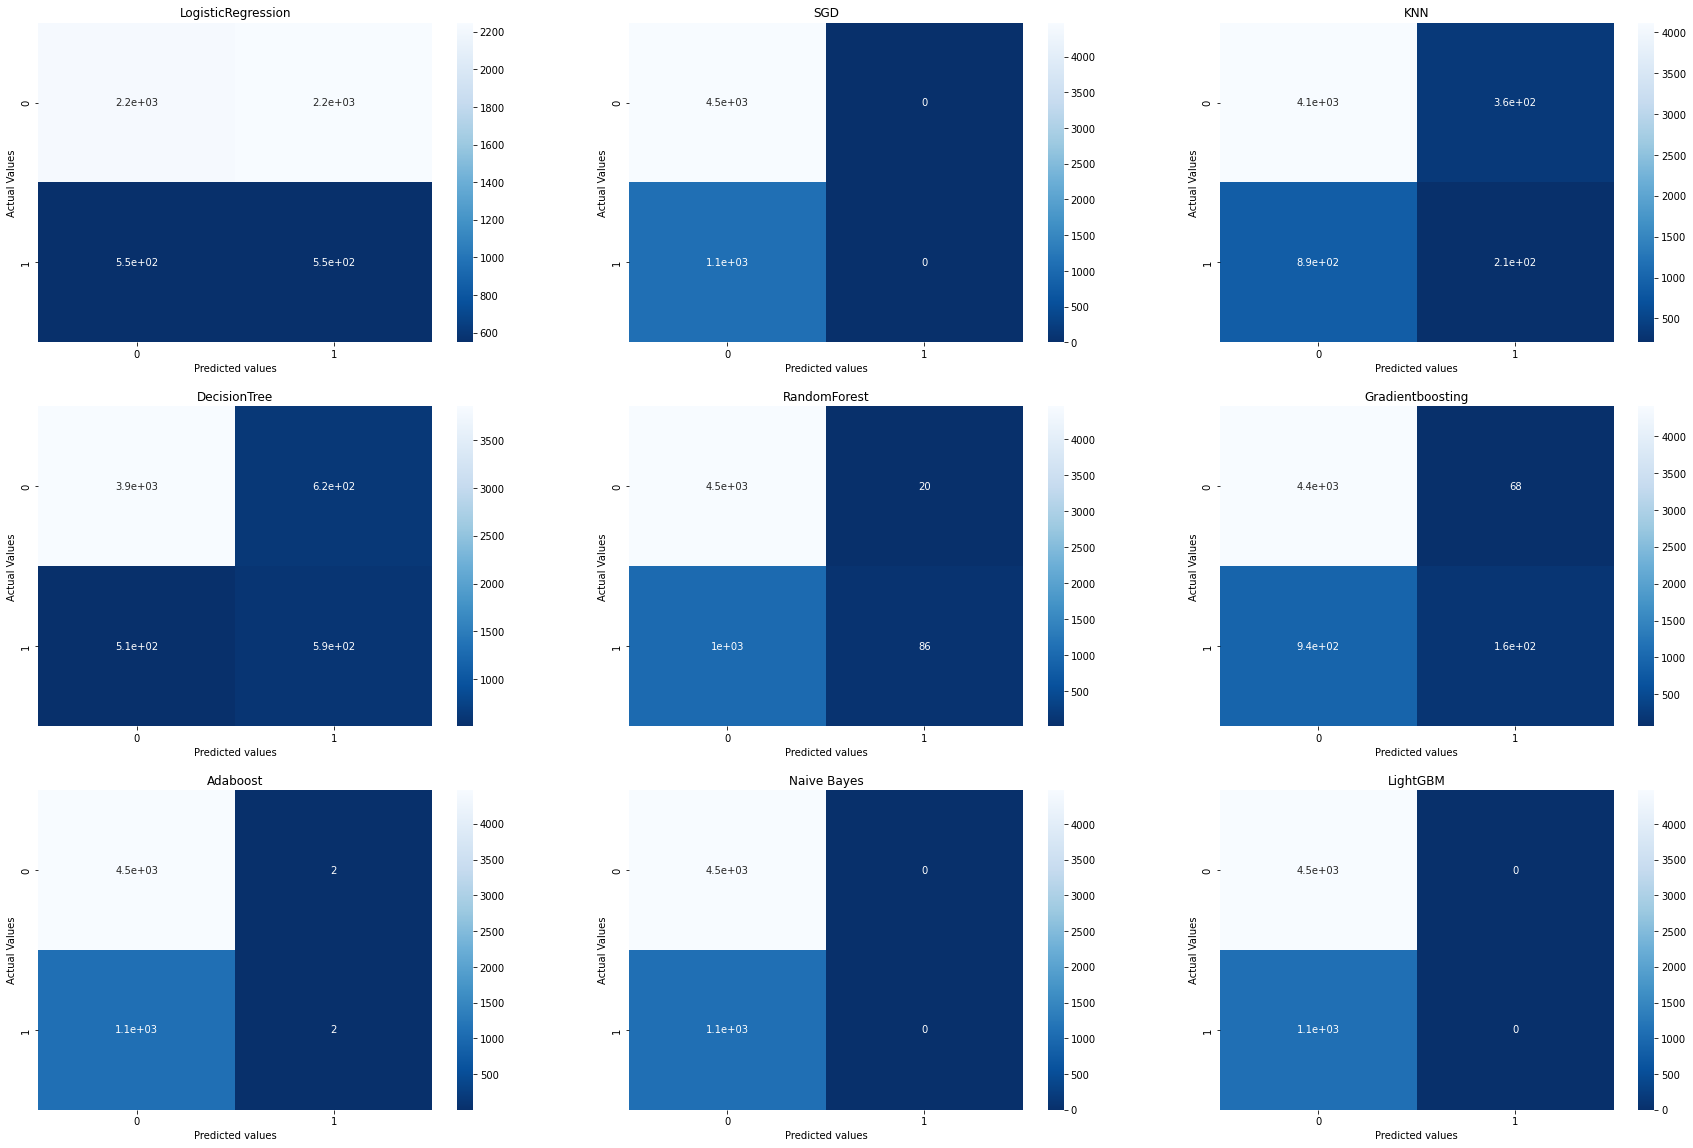

In [118]:
fig = plt.figure(figsize = (30 , 20))
for i in range(len(cm_list)):
    cm = cm_list[i]
    mod = model_list[i]
    sub = fig.add_subplot(3,3,i+1).set_title(mod)
    cm_plot = sns.heatmap(cm , annot = True , cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted values')
    cm_plot.set_ylabel('Actual Values')

In [119]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'ROC-AUC': roc_auc_list})
result_df

Model  Accuracy  ROC-AUC
0  LogisticRegression      0.50     0.50
1                 SGD      0.80     0.50
2                 KNN      0.78     0.55
3        DecisionTree      0.80     0.70
4        RandomForest      0.81     0.54
5    Gradientboosting      0.82     0.57
6            Adaboost      0.80     0.50
7         Naive Bayes      0.80     0.50
8            LightGBM      0.80     0.50

#### The best performing model are Decision Tree, Random Forest and GradientBoosting

Lets also try making a Neural Network Model

In [120]:
##Neural Network Model

model = Sequential()

model.add(Dense(12, input_dim=12, activation='relu', kernel_regularizer=l2(1e-6),kernel_initializer="glorot_normal"))
model.add(Dropout(0.50))
model.add(Dense(24, activation='relu',kernel_regularizer=l2(1e-6), kernel_initializer="glorot_normal"))
model.add(Dropout(0.50))
model.add(Dense(16, activation='relu',kernel_regularizer=l2(1e-6), kernel_initializer="glorot_normal"))
model.add(Dropout(0.50))
model.add(Dense(8, activation='relu',kernel_regularizer=l2(1e-6), kernel_initializer="glorot_normal"))
model.add(Dropout(0.50))

model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(1e-6), kernel_initializer="glorot_normal"))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


auc = tf.keras.metrics.AUC()
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy',auc])

model_history = model.fit(X_train, y_train, epochs=50,
                                        batch_size=32, 
                                        validation_split=0.3, 
                                        shuffle=True)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/50
285/285 [==============================] - 2s 4ms/step - loss: 105.7573 - accuracy: 0.5577 - auc_2: 0.4948 - val_loss: 2.0804 - val_accuracy: 0.4780 - val_auc_2: 0.4871
Epoch 2/50
285/285 [==============================] - 1s 5ms/step - loss: 15.7112 - accuracy: 0.6313 - auc_2: 0.4971 - val_loss: 0.6417 - val_accuracy: 0.6868 - val_auc_2: 0.4908
Epoch 3/50
285/285 [==============================] - 1s 5ms/step - loss: 5.3358 - accuracy: 0.7006 - auc_2: 0.5043 - val_loss: 0.5446 - val_accuracy: 0.8114 - val_auc_2: 0.4951
Epoch 4/50
285/285 [==============================] - 1s 4ms/step - loss: 2.5165 - accuracy: 0.7364 - auc_2: 0.5023 - val_loss: 0.5222 - val_accuracy: 0.8114 - val_auc_2: 0.4944
Epoch 5/50
285/285 [==============================] - 1s 5ms/step - loss: 1.5377 - accuracy: 0.7592 - auc_2: 0.5017 - val_loss: 0.5078 -

## Profit Prediction

In [131]:
numdf = df.select_dtypes(include=['int64', 'float64'])

In [132]:
numdf

Days for shipping (real)  Days for shipment (scheduled)  \
0                              3                              4   
1                              5                              4   
2                              4                              4   
3                              3                              4   
4                              2                              4   
...                          ...                            ...   
180514                         4                              4   
180515                         3                              2   
180516                         5                              4   
180517                         3                              4   
180518                         4                              4   

        Benefit per order  Sales per customer  Late_delivery_risk  \
0                   91.25              314.64                   0   
1                 -249.09              311.36                   1   
2                 -247.78              309.72                   0   
3                   22.86              304.81                   0   
4                  134.21              298.25                   0   
...                   ...                 ...                 ...   
180514              40.00              399.98                   0   
180515            -613.77              395.98                   1   
180516             141.11              391.98                   1   
180517             186.23              387.98                   0   
180518             168.95              383.98                   0   

        Order Customer Id  Order Id  Order Item Cardprod Id  \
0                   20755     77202                    1360   
1                   19492     75939                    1360   
2                   19491     75938                    1360   
3                   19490     75937                    1360   
4                   19489     75936                    1360   
...                   ...       ...                     ...   
180514               1005     26043                    1004   
180515               9141     26037                    1004   
180516                291     26024                    1004   
180517               2813     26022                    1004   
180518               7547     26018                    1004   

        Order Item Discount  Order Item Discount Rate  Order Item Id  \
0                     13.11                      0.04         180517   
1                     16.39                      0.05         179254   
2                     18.03                      0.06         179253   
3                     22.94                      0.07         179252   
4                     29.50                      0.09         179251   
...                     ...                       ...            ...   
180514                 0.00                      0.00          65177   
180515                 4.00                      0.01          65161   
180516                 8.00                      0.02          65129   
180517                12.00                      0.03          65126   
180518                16.00                      0.04          65113   

        Order Item Product Price  Order Item Profit Ratio  \
0                         327.75                     0.29   
1                         327.75                    -0.80   
2                         327.75                    -0.80   
3                         327.75                     0.08   
4                         327.75                     0.45   
...                          ...                      ...   
180514                    399.98                     0.10   
180515                    399.98                    -1.55   
180516                    399.98                     0.36   
180517                    399.98                     0.48   
180518                    399.98                     0.44   

        Order Item 

In [134]:
X= numdf.drop(["Order Profit Per Order"], axis= 1)
y= numdf["Order Profit Per Order"]

In [135]:
#splitting train and test datasets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state= 5)

*** Random_forest ***


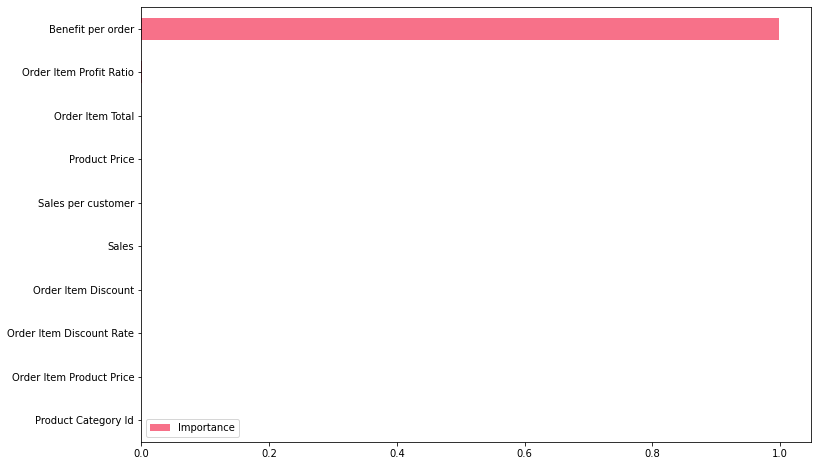



*** Ada_boost ***


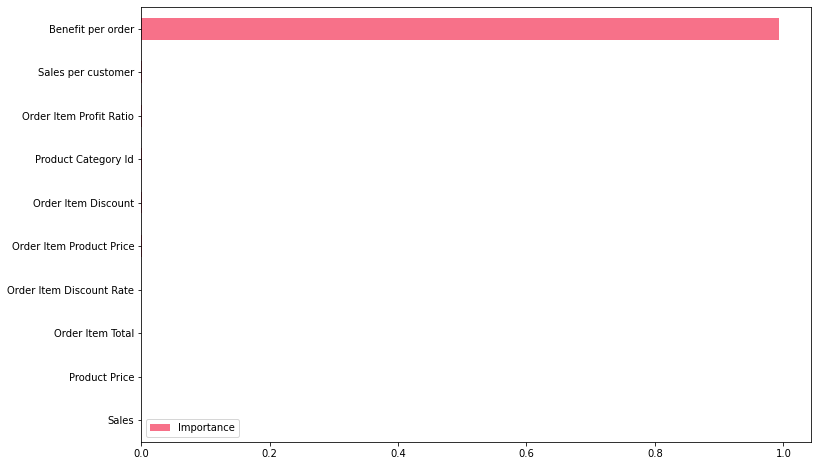



*** XGBoost ***


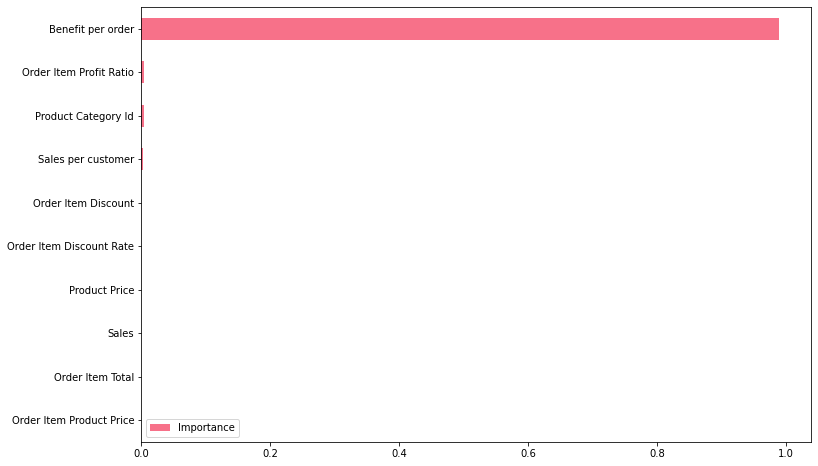



*** Decison_tree ***


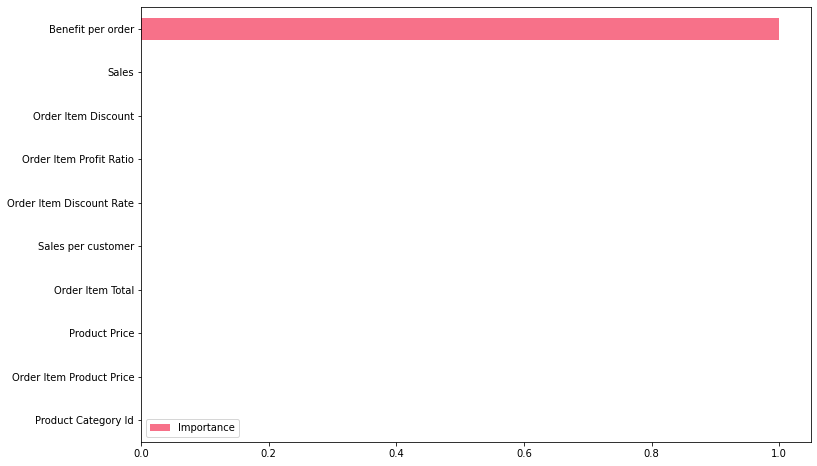

In [136]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
scores = mutual_info_regression(X_train, y_train)

# Select the top k features based on the scores
k = 5
top_k_features = X.columns[np.argsort(scores)[-k:]]

# Train a Random Forest Regressor on the top k features
X_top_k = X[top_k_features]
models = {
    'Random_forest' : RandomForestRegressor(),
    'Ada_boost': AdaBoostRegressor(),
    'XGBoost' : XGBRegressor(),
    'Decison_tree': DecisionTreeRegressor()
}
for model_name , model in models.items():
  model.fit(X_top_k, y)
  # Plot the importance of each feature
  print ("***", model_name, "***")
  importance = model.feature_importances_
  importance = pd.DataFrame(importance, index=top_k_features, columns=['Importance'])
  importance.sort_values(by='Importance', inplace=True)
  importance.plot(kind='barh', figsize=(12, 8) , color = sns.color_palette("husl"))
  plt.show()
  print('\n')

In [139]:
X_5 = numdf[['Benefit per order' , 'Sales' , 'Order Item Discount' , 'Order Item Profit Ratio', 'Product Category Id']]

In [140]:
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3, random_state= 5)

In [141]:
#machine learning model pipeline
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors = [LinearRegression,
                                                                                        XGBRegressor,
                                                                                        ElasticNet,
                                                                                        DecisionTreeRegressor,
                                                                                        RandomForestRegressor,
                                                                                        LGBMRegressor,
                                                                                       ])
# fitting data in LazyClassifier
algo, predictions = reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 6/6 [00:55<00:00,  9.18s/it]


In [142]:
print(algo)

                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
LinearRegression                     1.00       1.00  0.00        0.09
DecisionTreeRegressor                1.00       1.00  3.60        0.71
XGBRegressor                         1.00       1.00  3.72        2.94
RandomForestRegressor                1.00       1.00  5.49       50.79
LGBMRegressor                        0.99       0.99  9.25        0.43
ElasticNet                           0.91       0.91 32.16        0.09


In [147]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Rsquared : ", r2_score(y_test, y_pred))

MAE :  5.97863066232045e-14
MSE :  1.4068145105028744e-26
RMSE :  1.1860921172079656e-13
Rsquared :  1.0


In [148]:
# Coefficient of determination
print("Linear Regression r2 score:", round(r2_score(y_test, model.predict(X_test)),3))

Linear Regression r2 score: 1.0


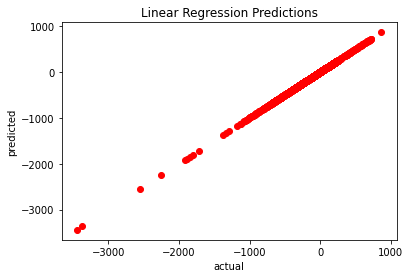

In [149]:
plt.scatter(y_test, model.predict(X_test), color = 'red')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Linear Regression Predictions")
#plt.savefig('Linear Regression Predictions.png',dpi=200)

plt.show();

## Late Delivery Prediction

In [150]:
df['Late_delivery_risk'].value_counts() #check for unbalanced data

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [151]:
X= numdf.drop(["Late_delivery_risk"], axis= 1) 
y= numdf["Late_delivery_risk"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [153]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [154]:
classifiers= []
classifiers.append(KNeighborsClassifier(n_neighbors=1))
classifiers.append(LogisticRegression())
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier(max_depth=5))

In [155]:
#train-test split or hold-out validation
accuracy_results1= []
for a in classifiers:
  accuracy_results1.append(round(accuracy_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

In [156]:
eval_frame= pd.DataFrame()
eval_frame['Model']= ["KNN", "Logistic Regression", "Naive Bayes", "Random Forest"]
eval_frame['Accuracy']= accuracy_results1
eval_frame

Model  Accuracy
0                  KNN     91.89
1  Logistic Regression     97.54
2          Naive Bayes     93.76
3        Random Forest     93.63

In [161]:
#kfold & Stratified sampling validation
accuracy_results2= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results2.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                         cv= KFold(), n_jobs= -1)*100),2))

accuracy_results3= []
for a in classifiers:
  pipe = make_pipeline(StandardScaler(), a)
  accuracy_results3.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                         cv= StratifiedKFold(), n_jobs= -1)*100),2))
eval_frame['strafifiedkfold_5']= accuracy_results3
eval_frame['kfold_5']= accuracy_results2
eval_frame                                                      

Model  Accuracy  strafifiedkfold_5  kfold_5
0                  KNN     91.89              88.47    91.06
1  Logistic Regression     97.54              97.55    97.55
2          Naive Bayes     93.76              92.37    92.96
3        Random Forest     93.63              91.96    93.60